In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import geopandas as gpd

import json
from tqdm import tqdm
from glob import glob

import matplotlib.pyplot as plt
from haversine import haversine, Unit
n_grid=925


In [39]:
dist_mat=sp.sparse.load_npz(f'../out/dist_mat_{n_grid}.npz')

with open(f'/mnt/beegfs/lcesarini/2024_dis_io/out/UL_italy_poly_assigned_{n_grid}.json', 'r', encoding='utf-8') as f:
# with open('/mnt/beegfs/lcesarini/2024_dis_io/out/UL_italy_poly_assigned.json', 'r', encoding='utf-8') as f:
    r=json.load(f) 

gdf=json.loads(r)


lon=[]
lat=[]
sectors=[]
id_grid=[]
row_id=[]
for f in tqdm(gdf['features']):
    lon.append(f['properties']['lng'])
    lat.append(f['properties']['lat'])
    row_id.append(f['properties']['row_id'])
    id_grid.append(f['properties']['index'])
    sectors.append(f['properties']['Sectors'])

100%|██████████| 4810493/4810493 [00:04<00:00, 1028995.38it/s]


In [40]:
id_grid=np.array(id_grid).reshape(-1,1)
lon=np.array(lon).reshape(-1,1)
lat=np.array(lat).reshape(-1,1)
sectors=np.array(sectors)
row_id=np.array(row_id).reshape(-1,1)

In [ ]:
unique_id_grid=np.unique(id_grid)
distance_matrix=[]
dist_true=[]
dict_distance_matrix={}
dict_dist_true={}
# for i in range(0,len(unique_id_grid)):
i=0
for k in tqdm(range(1)):
# for each grid id, sample a UL inside that grid
    SAMPLE_I=np.random.choice(np.arange(0,lat[id_grid==unique_id_grid[i]].shape[0]), 1)[0]
    COORDS_I=lon[id_grid==unique_id_grid[i]][SAMPLE_I],lat[id_grid==unique_id_grid[i]][SAMPLE_I]# then, sample a UL inside any other grid

    distance_matrix=[]
    dist_true=[]
    for j in range(0,len(unique_id_grid)):

    # for j in range(0,3):
        if j!=i:
            SAMPLE_J=np.random.choice(np.arange(0,lat[id_grid==unique_id_grid[j]].shape[0]), 1)[0]
            COORDS_J=lon[id_grid==unique_id_grid[j]][SAMPLE_J],lat[id_grid==unique_id_grid[j]][SAMPLE_J]# then, sample a UL inside any other grid
            # then, get the vector of distances according to the distance matrix
            # print(f'{i},{j}: {dist_mat[i,j] / 1000:.2f}')
            distance_matrix.append(dist_mat[i,j] / 1000)
            distance = haversine(COORDS_I, COORDS_J, unit=Unit.KILOMETERS)
            # print(f'{i},{j}: {distance:.2f}')
            dist_true.append(distance)
        else:
            next
    
    dict_distance_matrix.update({f'{k}_{unique_id_grid[i]}':distance_matrix})
    dict_dist_true.update({k:dist_true})
# then, get the vector of distances according to the distance matrix

# finally the vector of REAL distances accordign to lon & lat

# in the end we will have two matrix with the distances, one according to the distance matrix and the other according to the real distances
    

In [ ]:
import os
from datetime import datetime, timedelta

def list_newer_files(directory, cutoff_date):
    # Get the timestamp for the cutoff date
    cutoff_timestamp = cutoff_date.timestamp()
    
    # List to store the names of files that are newer than the cutoff date
    newer_files = []
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if it is a file (not a directory)
        if os.path.isfile(file_path):
            # Get the modification time of the file
            file_mod_time = os.path.getmtime(file_path)
            
            # Compare the modification time with the cutoff timestamp
            if file_mod_time > cutoff_timestamp:
                newer_files.append(filename)
    
    return newer_files

# Example usage
directory_path = '/mnt/beegfs/lcesarini/ge-distance/src/distance/tmp'
cutoff_date = datetime(2024, 9, 10)  # Specify the cutoff date here

newer_files = list_newer_files(directory_path, cutoff_date)
print("Files newer than", cutoff_date, ":")
[os.path.join(directory_path,file) for file in newer_files]

In [9]:
list_df=[]
for file in glob("/mnt/beegfs/lcesarini/ge-distance/src/distance/tmp/distances_*.csv"):
    ll_df=pd.read_csv(file) 
    ll_df['n_grid']=file.split('/')[-1].split('_')[1]
    list_df.append(ll_df)
DF=pd.concat(list_df)
DF

,index_grid,dist_matrix,dist_true,n_grid
0,0,1324.693712,955.524219,780
1,0,922.397678,593.721113,780
2,0,1051.095697,750.419586,780
3,0,1050.287997,745.064509,780
4,0,985.130341,713.547926,780
...,...,...,...,...
8015,9,370.030521,318.362482,505
8016,9,420.170777,322.030747,505
8017,9,475.147153,403.803290,505
8018,9,548.639721,531.304517,505


In [10]:
DF['j_grid']=np.tile(np.arange(DF[(DF.index_grid==0) & (DF.n_grid == DF.n_grid.iloc[0])].shape[0]),len(list_df)*10)
DF

,index_grid,dist_matrix,dist_true,n_grid,j_grid
0,0,1324.693712,955.524219,780,0
1,0,922.397678,593.721113,780,1
2,0,1051.095697,750.419586,780,2
3,0,1050.287997,745.064509,780,3
4,0,985.130341,713.547926,780,4
...,...,...,...,...,...
8015,9,370.030521,318.362482,505,797
8016,9,420.170777,322.030747,505,798
8017,9,475.147153,403.803290,505,799
8018,9,548.639721,531.304517,505,800


In [11]:
DF.n_grid.astype(int).max()

780

Text(0.5, 1.0, 'Distance according to distance matrix vs real distance for the grid of 925 cells')

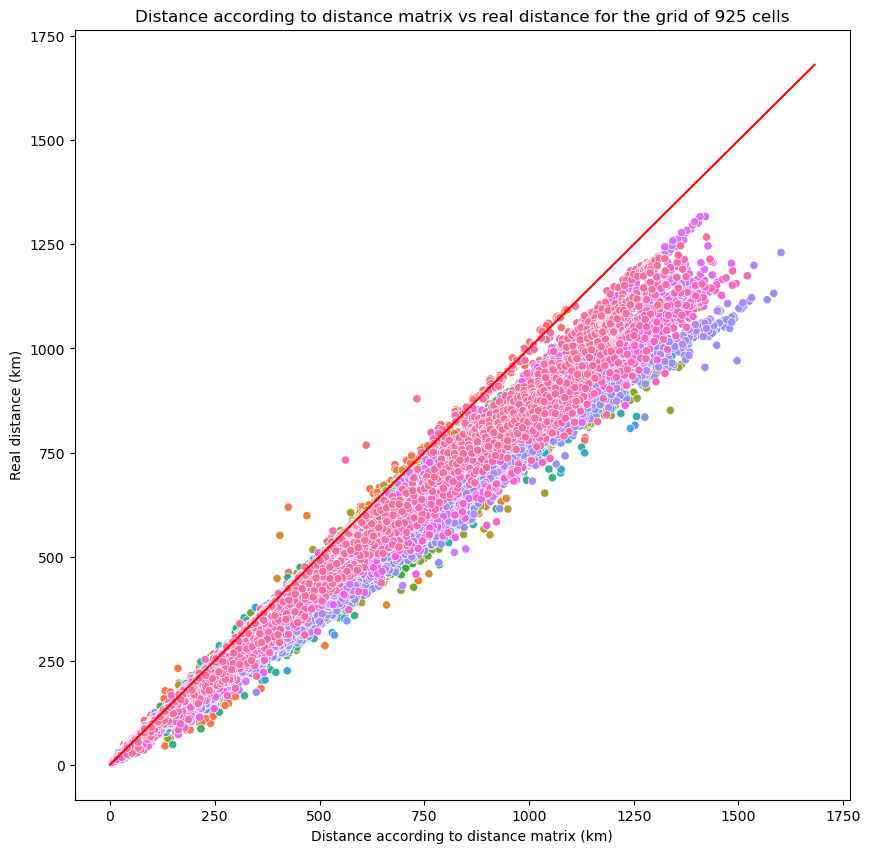

In [13]:
MAX=DF.groupby(['n_grid','j_grid']).mean()[['dist_matrix','dist_true']].values.max()

fig,ax=plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(data=DF.groupby(['n_grid','j_grid']).mean(),
                x='dist_matrix',y='dist_true',hue='n_grid',ax=ax,legend=None)
ax.plot([0,MAX*1.05],[0,MAX*1.05],color='red')
ax.set_xlabel('Distance according to distance matrix (km)')
ax.set_ylabel('Real distance (km)')
ax.set_title(f'Distance according to distance matrix vs real distance for the grid of {n_grid} cells')